In [1]:
from itertools import repeat
import numpy as np 
from scipy.stats import ttest_ind, pearsonr
import matplotlib.pyplot as plt
import pandas as pd 
pd.set_option('mode.chained_assignment', None)
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [3]:
data = pd.read_csv('/Users/chiragprabhakar/Documents/data_analytics_A1/final_assgnment/dataset - 2020-09-24.csv')
data = data.copy()
data.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [5]:
print('Shape of the dataset is {}'.format(data.shape))
data.head()

Shape of the dataset is (571, 59)


,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     570 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         309 non-null    float64
 11  Headed goals            502 non-null    float64
 12  Goals with right foot   502 non-null    float64
 13  Goals with left foot    502 non-null    float64
 14  Penalties scored        309 non-null    fl

In [9]:
#cleaning the data set
# Drop columns with excessive missing values (threshold: <30% non-null)
threshold = 0.3 * len(data)
data = data.dropna(axis=1, thresh=threshold)

#Fill missing numeric values with column mean
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill missing categorical values with mode
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Preview cleaned dataset
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           571 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             571 non-null    object 
 5   Age                     571 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         571 non-null    float64
 11  Headed goals            571 non-null    float64
 12  Goals with right foot   571 non-null    float64
 13  Goals with left foot    571 non-null    float64
 14  Penalties scored        571 non-null    fl

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,27.86,8.171315,121.920319,0%,8.576923,234.0,2,0,0,11.063745
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.00,8.171315,121.920319,0%,8.576923,0.0,0,0,0,11.063745
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.00,8.171315,121.920319,0%,8.576923,0.0,0,0,0,11.063745
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,44.53,28.000000,389.000000,16%,31.000000,144.0,23,0,125,8.000000
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,32.44,1.000000,45.000000,18%,0.000000,22.0,2,0,9,0.000000


In [11]:
# Remove entries which do not have age, jersey number and nationality 
data = data[data['Nationality'].notna()]
data = data[data['Age'].notna()]
data = data[data['Jersey Number'].notna()]

# cleaning the percentage sign
data['Cross accuracy %'] = data['Cross accuracy %'].str.replace(r'%', '').astype(float)
data['Shooting accuracy %'] = data['Shooting accuracy %'].str.replace(r'%', '').astype(float)
data['Tackle success %'] = data['Tackle success %'].str.replace(r'%', '').astype(float)


features = data.columns
data_clean = data[features]
data_clean.head()

data_clean_appNonZero = data_clean[data_clean['Appearances'] > 0] #prevents division by zero for players who are yet to make appearances

# take care off the data type for division
# separate cols with dtype objects and cols that may not be divided by appearances

cols = features.drop(['Age', 'Name', 'Appearances', 'Club', 'Nationality', 'Jersey Number', 'Cross accuracy %', 'Position', 'Goals per match', 
                      'Passes per match','Tackle success %', 'Shooting accuracy %'])
data_clean_appNonZero.loc[:, cols] = data_clean_appNonZero.loc[:, cols].div(data_clean_appNonZero['Appearances'], axis=0)

# positional classifications on the data as is
goalies = data[data['Position'] == 'Goalkeeper']
defenders = data[data['Position'] == 'Defender']
midfielders = data[data['Position'] == 'Midfielder']
forwards = data[data['Position'] == 'Forward']

# palyers who have made atleast 38 games (a seasons worth games)
# data as is
data_38app = data[data['Appearances'] >=38]
goalies_38app = goalies[goalies['Appearances'] >= 38]
defenders_38app = defenders[defenders['Appearances'] >= 38]
midfilders_38app = midfielders[midfielders['Appearances'] >= 38]
forwards_38app = forwards[forwards['Appearances'] >= 38]

# palyers who have made atleast 38 games (a seasons worth games)
# data normalized
all_players = data_clean_appNonZero[data_clean_appNonZero['Appearances'] >= 38]
goalies_ = data_clean_appNonZero[(data_clean_appNonZero['Position'] == 'Goalkeeper') & (data_clean_appNonZero['Appearances'] >= 38)]
defenders_ = data_clean_appNonZero[(data_clean_appNonZero['Position'] == 'Defender') & (data_clean_appNonZero['Appearances'] >= 38)]
midfielders_ = data_clean_appNonZero[(data_clean_appNonZero['Position'] == 'Midfielder') & (data_clean_appNonZero['Appearances'] >= 38)]
forwards_ = data_clean_appNonZero[(data_clean_appNonZero['Position'] == 'Forward') & (data_clean_appNonZero['Appearances'] >= 38)]

/var/folders/6l/_0lkgy4j415437kjczzvtdnh0000gn/T/ipykernel_28730/2536295812.py:23: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.4375     0.5625     0.4375     0.47727273 0.6097561  0.52525253
 0.3381295  0.58247423 0.51282051 1.         0.54347826 0.44444444
 0.48148148 0.61702128 0.36363636 0.42105263 0.         0.53030303
 0.39285714 0.53846154 0.46464646 0.49425287 0.45454545 0.5
 0.52173913 0.21428571 0.58050847 0.29310345 0.         0.14285714
 0.5625     0.33103448 0.30769231 0.33333333 0.17647059 0.28
 0.26229508 0.16666667 0.25490196 1.         0.27027027 0.24137931
 0.30769231 0.23943662 0.24137931 0.28571429 0.25714286 0.20588235
 0.2        0.28571429 0.21052632 1.         0.2        0.24107143
 0.5        0.36363636 0.25       0.24242424 0.25       0.25
 0.24242424 0.25       0.33333333 0.21505376 0.49494949 0.22826087
 0.24       0.28571429 0.21212121 0.25641026 0.25806452 0.27659574
 0.30769231 0

Descriptive Statistics:

Numerical Summary:
        Jersey Number         Age  Appearances        Wins      Losses  \
count     571.000000  571.000000   571.000000  571.000000  571.000000   
mean       19.534636   25.789474    68.823117   28.957968   23.896673   
std        14.172996    4.373512    81.797516   38.969376   28.488376   
min         1.000000   17.000000     0.000000    0.000000    0.000000   
25%         9.000000   22.000000     3.000000    1.000000    1.000000   
50%        18.000000   26.000000    36.000000   12.000000   14.000000   
75%        27.000000   29.000000   108.000000   41.000000   36.000000   
max        82.000000   38.000000   539.000000  272.000000  158.000000   

            Goals  Goals per match  Headed goals  Goals with right foot  \
count  571.000000       571.000000    571.000000             571.000000   
mean     7.327496         2.648414      1.414343               4.468127   
std     16.810490         5.882241      3.218863              10.358062 

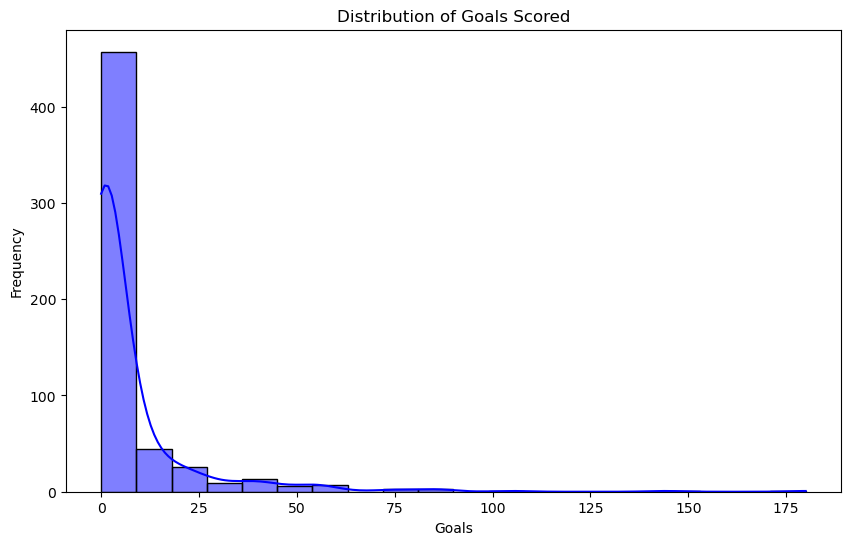

In [13]:
# DESCRIPTIVE STATISTICS/ EDA
print("Descriptive Statistics:\n")

# Summary statistics for numerical columns
numerical_summary = data.describe()
print("Numerical Summary:\n", numerical_summary)

# Count unique values for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_summary = {col: data[col].nunique() for col in categorical_columns}
print("\nUnique Values in Categorical Columns:\n", categorical_summary)

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values Per Column:\n", missing_values)

# Plot distribution of a key numerical variable (e.g., Goals)
plt.figure(figsize=(10, 6))
sns.histplot(data['Goals'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribution of Goals Scored')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()


Inferential Statistics:

T-test: Comparing Passes Between Midfielders and Defenders
T-statistic: -0.275
P-value: 0.784
There is no statistically significant difference in passes between midfielders and defenders.

Correlation between Goals and Assists:
Correlation Coefficient: 0.72, P-value: 0.0000


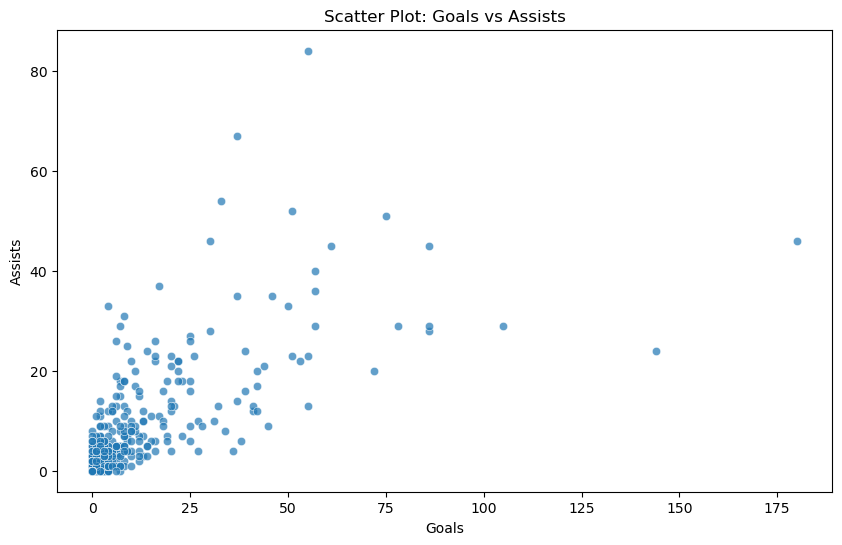

In [15]:
# INFERENTIAL STATISTICS / EDA
print("\nInferential Statistics:\n")

# Hypothesis Test: Difference in Goals between players aged 25-29 and 20-24
age_25_29 = data[data['Age'] == '25-29']['Goals'].dropna()
age_20_24 = data[data['Age'] == '20-24']['Goals'].dropna()

# T-test: Comparing Passes Between Midfielders and Defenders

# Filter the data for the two groups
midfielders_passes = data[data['Position'] == 'Midfielder']['Passes'].dropna()
defenders_passes = data[data['Position'] == 'Defender']['Passes'].dropna()

# Perform a t-test
t_stat, p_value = ttest_ind(midfielders_passes, defenders_passes, equal_var=False)

# Output the results
print("T-test: Comparing Passes Between Midfielders and Defenders")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("The difference in passes between midfielders and defenders is statistically significant.")
else:
    print("There is no statistically significant difference in passes between midfielders and defenders.")

# Correlation between Goals and Assists
correlation, p_corr = pearsonr(data['Goals'].dropna(), data['Assists'].dropna())
print(f"\nCorrelation between Goals and Assists:\nCorrelation Coefficient: {correlation:.2f}, P-value: {p_corr:.4f}")

# Scatter plot for Goals vs. Assists
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Goals', y='Assists', data=data, alpha=0.7)
plt.title('Scatter Plot: Goals vs Assists')
plt.xlabel('Goals')
plt.ylabel('Assists')
plt.show()

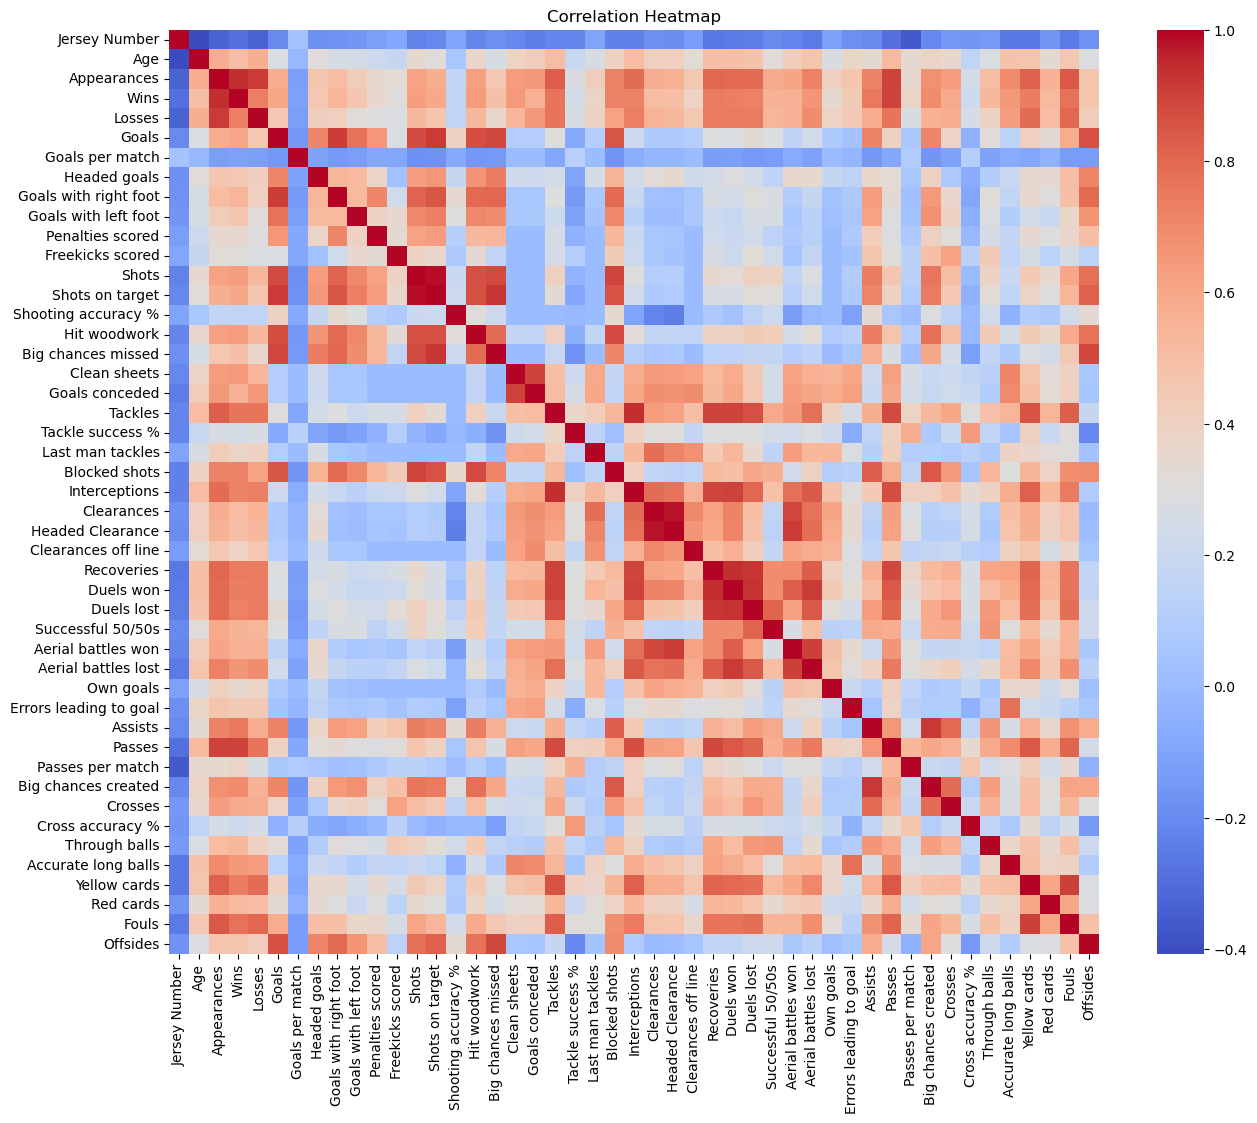

In [39]:
# EDA: Correlation heatmap for numerical columns
# This produces a "correlation matrix," where values range from:
# 1.0: Perfect positive correlation (when one goes up, the other also goes up).
# -1.0: Perfect negative correlation (when one goes up, the other goes down).
# 0: No correlation (no relationship).
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
corr = data[numerical_cols].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

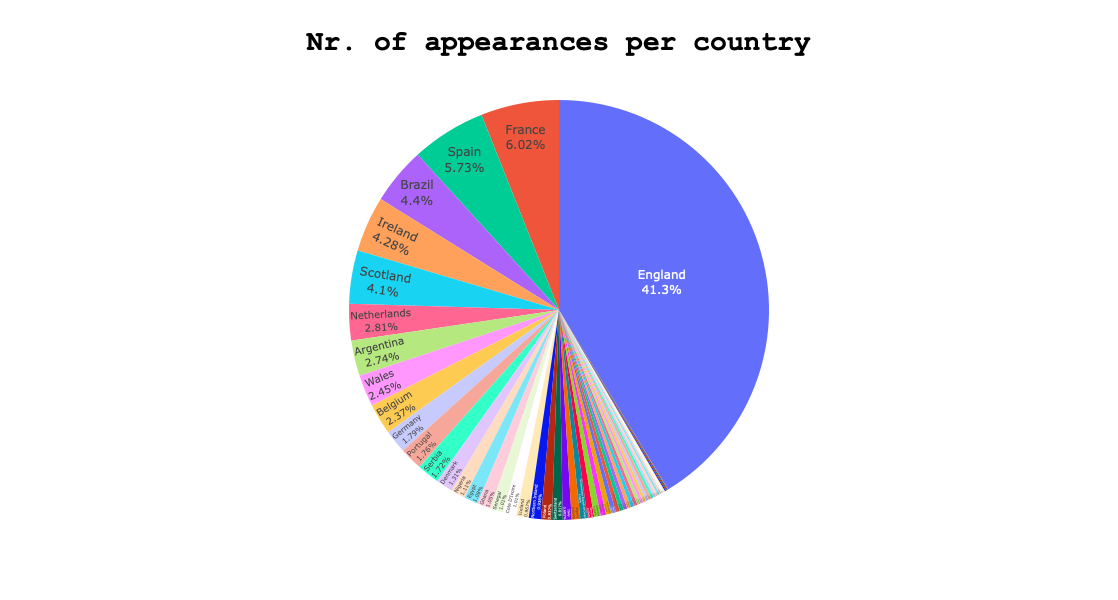

In [17]:
#1
df = data
fig = px.pie(df,
             values='Appearances',
             names='Nationality',
             title='Countries represented in the EPL by number of appearances',
             )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='<b> Nr. of appearances per country <b>', 
                  title_x=0.5, 
                  titlefont=dict(color='black', 
                            size=28, 
                            family="Courier New, monospace",),
                  width=600,
                  height=600,
                  showlegend=False,
                 )
iplot(fig)

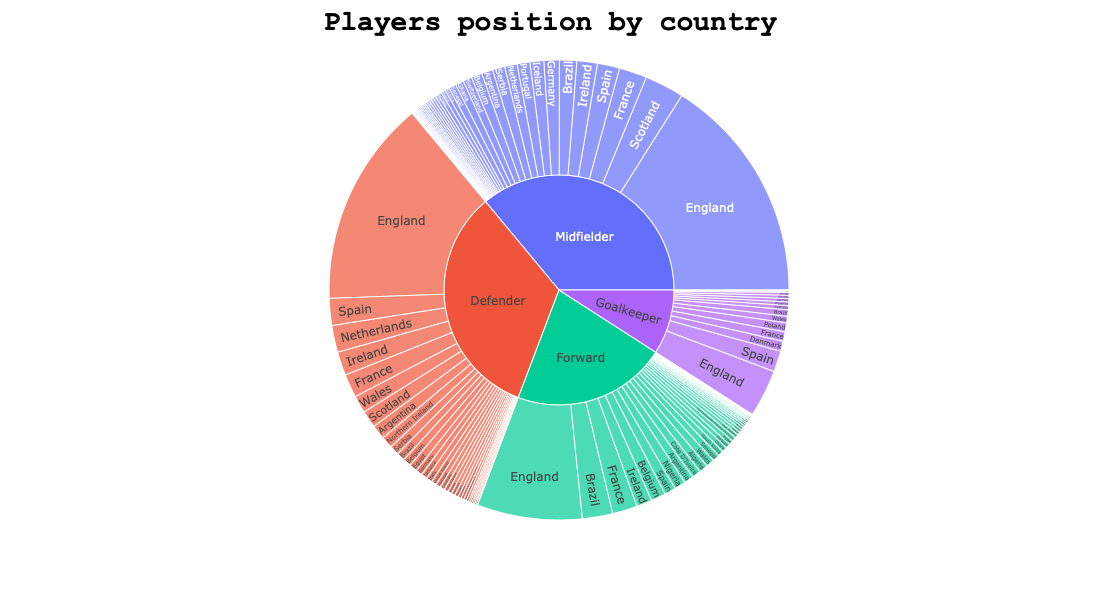

In [19]:
#2
df = data
fig = px.sunburst(df, 
                   path=['Position', 'Nationality'], 
                   values='Appearances', 
                 )
fig.update_layout(title_text='<b>Players position by country <b>', 
                  title_x=0.5, 
                  titlefont=dict(color='black', 
                            size=28, 
                            family="Courier New, monospace",),
                  width=600,
                  height=600,
                  showlegend=False,
                 )
iplot(fig)

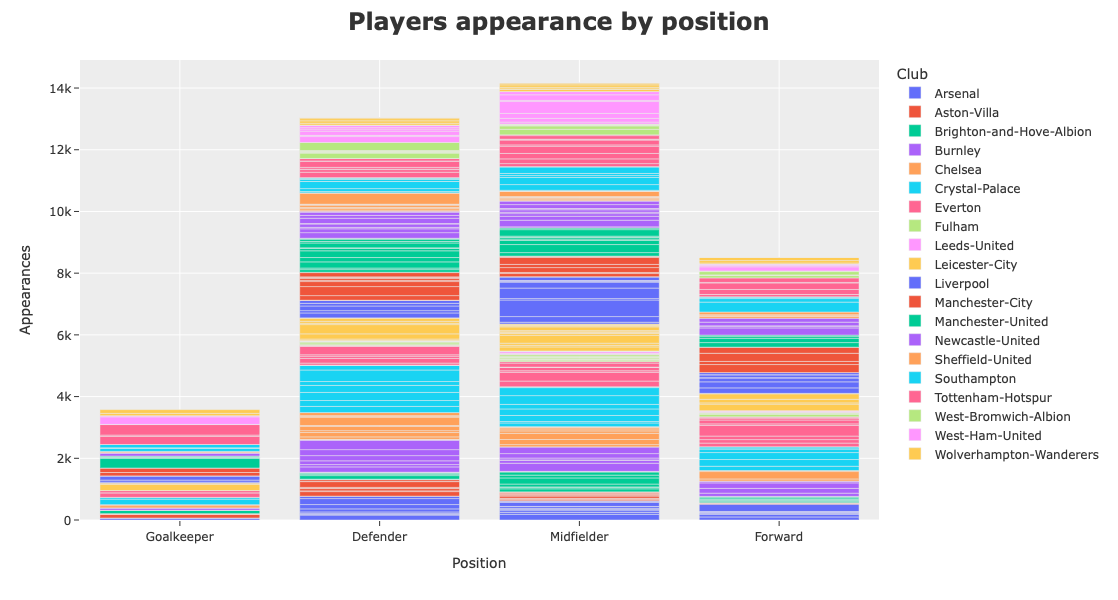

In [21]:
#3
df = data
fig = px.bar(df, x="Position", y="Appearances",color='Club',
             hover_data=["Name"],
             width=750, height=600,)
fig.update_layout(
             template='ggplot2',
             title='<b>Players appearance by position<b>',
             titlefont={'size':24})
iplot(fig)

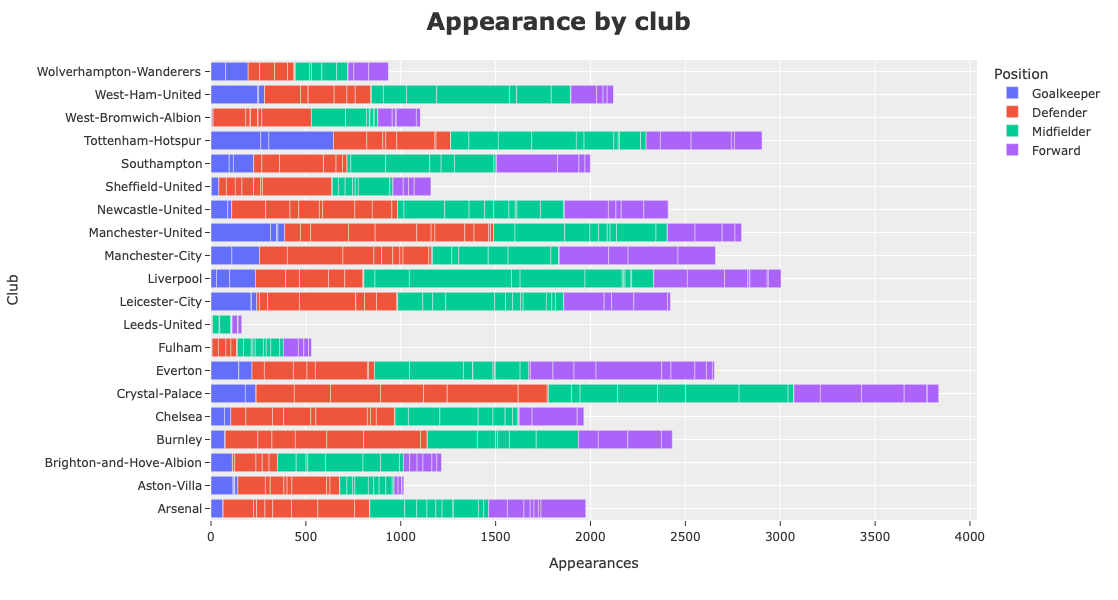

In [23]:
fig = px.bar(df, y="Club", x="Appearances",color='Position',
             hover_data=["Name"],
             width=750, 
             height=600,
             )
fig.update_layout(
             template='ggplot2',
             title='<b>Appearance by club<b>',
             titlefont={'size':24},
)
iplot(fig)

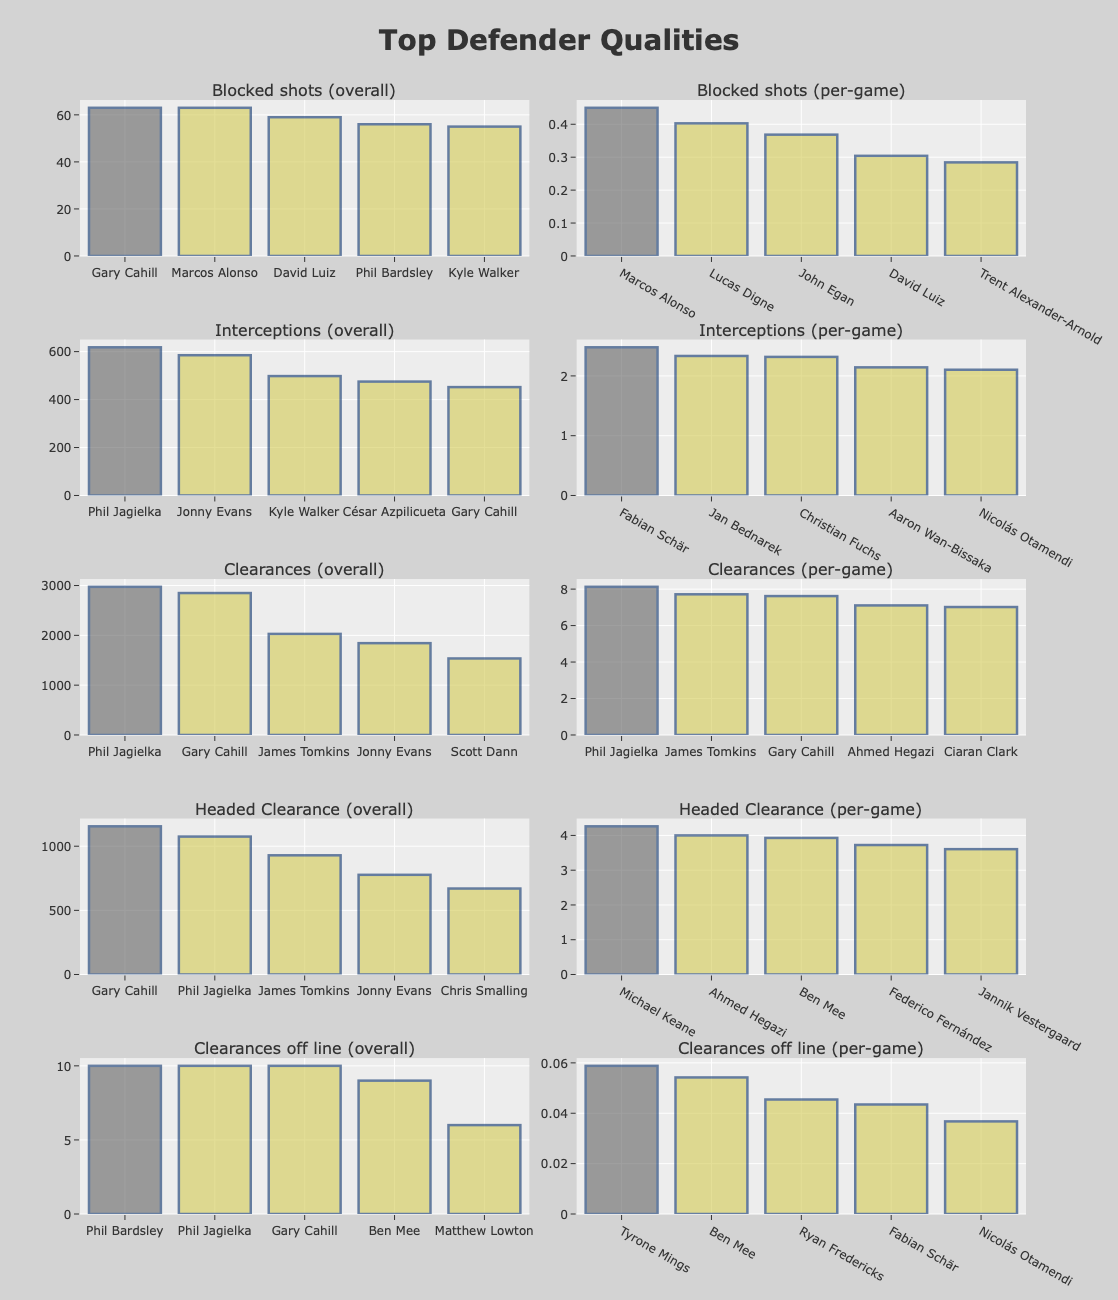

In [29]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

defenders_attr =['Blocked shots', 'Interceptions', 'Clearances','Headed Clearance', 'Clearances off line',
                 'Duels won','Successful 50/50s', 'Aerial battles won']
# top=5
# defenders_attr =['Tackles', 'Tackle success'Interceptions' %', 'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
#                  'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won','Successful 50/50s', 'Aerial battles won'] 
# for atr in defenders_attr:
#     text = 5
#     df = data_38app[data_38app["Position"] == 'Defender'].sort_values(by=atr, ascending=False).head(top)
#     fig = px.bar(df, x="Name", 
#                  y=atr,
#                  color='Club',
#                  hover_name=None,
#                  title="Defender defensive ability: Top {} {} ".format(text, atr.lower()))
#     fig.update_layout(autosize=False, width=1000, height=500)
#     iplot(fig)


top = 5
fig = make_subplots(
    rows=5, cols=2,
    horizontal_spacing = 0.05, 
    vertical_spacing = 0.075, 
    subplot_titles=('Blocked shots (overall)', 'Blocked shots (per-game)','Interceptions (overall)', 'Interceptions (per-game)','Clearances (overall)',
                    'Clearances (per-game)','Headed Clearance (overall)', 'Headed Clearance (per-game)','Clearances off line (overall)', 'Clearances off line (per-game)'),
    )


df = defenders_38app.sort_values(by='Blocked shots', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Name"], 
             y=df['Blocked shots'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=1, col=1)
              
df = defenders_38app.sort_values(by='Interceptions', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Name"], 
             y=df['Interceptions'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=2, col=1)  

df = defenders_38app.sort_values(by='Clearances', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Name"], 
             y=df['Clearances'],
             #color='Club',
            #hover_name=None,
             orientation='v'),
             row=3, col=1)


df = defenders_38app.sort_values(by='Headed Clearance', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Name"], 
             y=df['Headed Clearance'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=4,col=1)

df = defenders_38app.sort_values(by='Clearances off line', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Name"], 
             y=df['Clearances off line'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=5, col=1)


df = defenders_.sort_values(by='Blocked shots', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Name"], 
             y=df['Blocked shots'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=1, col=2)

df = defenders_.sort_values(by='Interceptions', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Name"], 
             y=df['Interceptions'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=2, col=2)
  

df = defenders_.sort_values(by='Clearances', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Name"], 
             y=df['Clearances'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=3, col=2)


df = defenders_.sort_values(by='Headed Clearance', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Name"], 
             y=df['Headed Clearance'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=4,col=2)

df = defenders_.sort_values(by='Clearances off line', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Name"], 
             y=df['Clearances off line'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=5, col=2)

#fig.update_layout(title_text='Top Defender Qualities', title_x=0.5)
fig.update_traces(marker_color= ['rgb(96, 96, 96)','rgb(210,202,82)','rgb(210,202,82)','rgb(210,202,82)',
                                 'rgb(210,202,82)', 'rgb(210,202,82)'], marker_line_color='rgb(8,48,107)',
                  marker_line_width=2.5, opacity=0.6)

fig.update_layout(title_text='<b>Top Defender Qualities<b>', 
                  titlefont={'size':28},
                  title_x=0.5,
                  showlegend=False,
                  autosize=False, 
                  width=1300, 
                  height=1300,
                  template='ggplot2',
                  paper_bgcolor='lightgray')
fig.show()

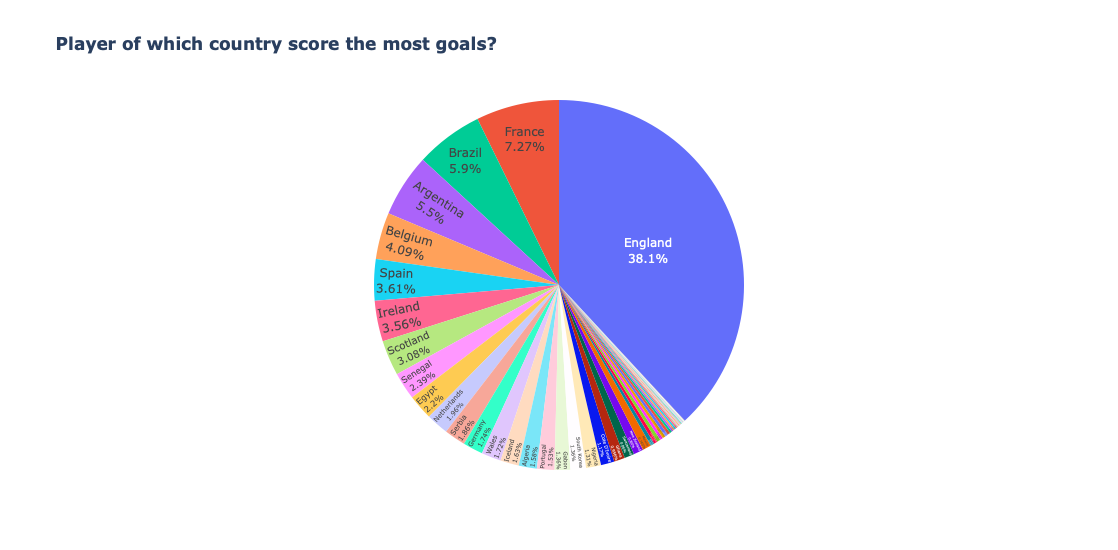

In [27]:
#data = data_38app.head(10)
fig = px.pie(data,
             values='Goals',
             names='Nationality',
             title='<b>Player of which country score the most goals? <b>',
             width=550, height=550,
             )
fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  showlegend= False,
                 )
iplot(fig)

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Hypothesis 1: Linear Regression to Predict Goals
print("\nLinear Regression: Predicting Goals")
X = data[['Appearances', 'Shots', 'Passes per match']].dropna()
y = data['Goals'].loc[X.index]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

# Display Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lin_reg.coef_
})
print("\nCoefficients:")
print(coefficients)

#Mean Squared Error (MSE):42(lower is better; it measures the average squared difference between actual and predicted values).​
# R-squared Score (R²): 0.88(ranges from 0 to 1; this indicates that the model explains 88% of the variability in the goals scored).


Linear Regression: Predicting Goals
Mean Squared Error: 49.54346975936134
R-squared Score: 0.6672927384826388

Coefficients:
            Feature  Coefficient
0       Appearances     0.010023
1             Shots     0.138611
2  Passes per match    -0.057201



K-Means Clustering


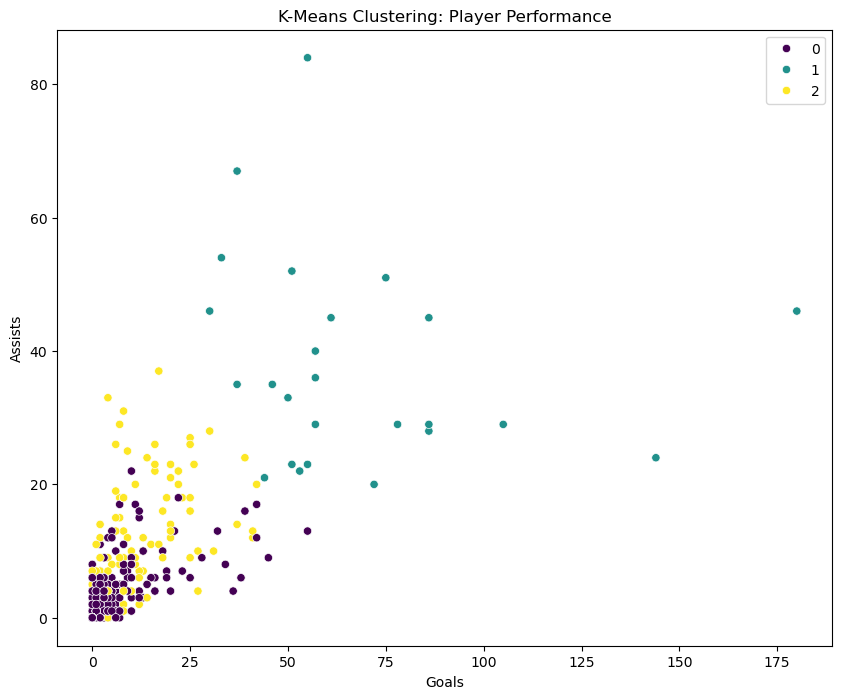

Clustering Complete. Assigned clusters added to dataset.


In [37]:
# Hypothesis 2: K-Means Clustering to Group Players
# This analysis aimed to group players with similar playing styles and performance into clusters. 
# The algorithm divided the players into three distinct groups based on their goals, assists, passes, and tackles.
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

print("\nK-Means Clustering")
kmeans_features = data[['Goals', 'Assists', 'Passes', 'Tackles']].dropna()
scaler = StandardScaler()
kmeans_scaled = scaler.fit_transform(kmeans_features)

# Model Training
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(kmeans_scaled)

# Assign Cluster Labels
data['Cluster'] = None
data.loc[kmeans_features.index, 'Cluster'] = kmeans.labels_

# Visualize Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=kmeans_features['Goals'],
    y=kmeans_features['Assists'],
    hue=kmeans.labels_,
    palette='viridis',
    legend='full'
)
plt.title('K-Means Clustering: Player Performance')
plt.xlabel('Goals')
plt.ylabel('Assists')
plt.show()

print("Clustering Complete. Assigned clusters added to dataset.")

# Clusters:
# Each player is assigned to one of three clusters (e.g., Cluster 0, Cluster 1, Cluster 2).
# Players in the same cluster are similar to each other in terms of Goals, Assists, Passes, and Tackles.